<a href="https://colab.research.google.com/github/utkarshjadhav96/ML-Lab/blob/main/ML_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/utkarshjadhav96/ML-Lab/main/employee_data.csv"  # Corrected raw URL
df = pd.read_csv(url)
print(df.head())

   Employee_ID        Name  Age  Salary Department  Experience (Years)  \
0          101  Employee_1   50  110592         HR                   9   
1          102  Employee_2   36   48110         IT                  29   
2          103  Employee_3   29  119309         IT                  26   
3          104  Employee_4   42   67266  Marketing                  25   
4          105  Employee_5   40   92992    Finance                  24   

        City  Gender  Performance Score  
0     Denver  Female                 84  
1  San Diego    Male                 92  
2    Chicago  Female                 97  
3    Seattle    Male                 65  
4     Boston    Male                 91  


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Employee_ID           0
Name                  0
Age                   0
Salary                0
Department            0
Experience (Years)    0
City                  0
Gender                0
Performance Score     0
dtype: int64


In [7]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-7-cfb9c0e11d63>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


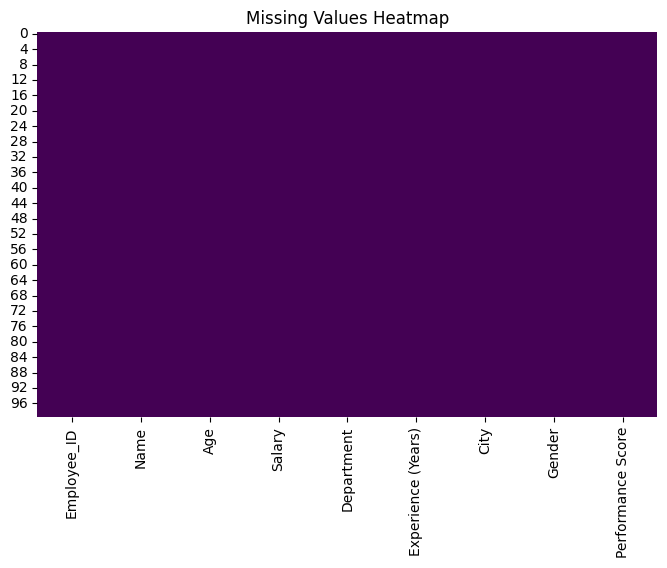

In [8]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
print("Dataset Summary:\n", df.describe())


Dataset Summary:
        Employee_ID         Age         Salary  Experience (Years)  \
count   100.000000  100.000000     100.000000          100.000000   
mean    150.500000   40.060000   80249.100000           18.390000   
std      29.011492   10.688255   23118.668817           10.363002   
min     101.000000   22.000000   40206.000000            1.000000   
25%     125.750000   30.000000   61971.750000            9.750000   
50%     150.500000   41.500000   83263.000000           19.500000   
75%     175.250000   48.000000  101158.500000           27.250000   
max     200.000000   59.000000  119309.000000           34.000000   

       Performance Score  
count         100.000000  
mean           79.300000  
std            11.449935  
min            60.000000  
25%            69.750000  
50%            79.500000  
75%            90.000000  
max            99.000000  


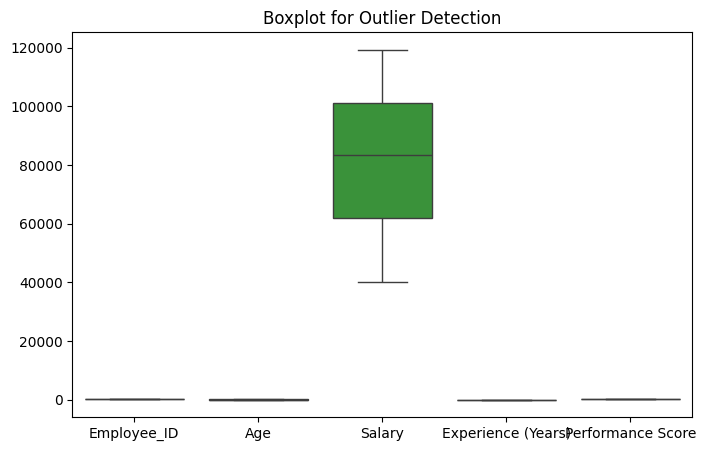

In [10]:
# Detecting Outliers using Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Boxplot for Outlier Detection")
plt.show()

Correlation Matrix:
                     Employee_ID       Age    Salary  Experience (Years)  \
Employee_ID            1.000000  0.095999 -0.082522            0.034690   
Age                    0.095999  1.000000 -0.074171           -0.135182   
Salary                -0.082522 -0.074171  1.000000            0.199221   
Experience (Years)     0.034690 -0.135182  0.199221            1.000000   
Performance Score     -0.101260 -0.206742  0.099175            0.028714   

                    Performance Score  
Employee_ID                 -0.101260  
Age                         -0.206742  
Salary                       0.099175  
Experience (Years)           0.028714  
Performance Score            1.000000  


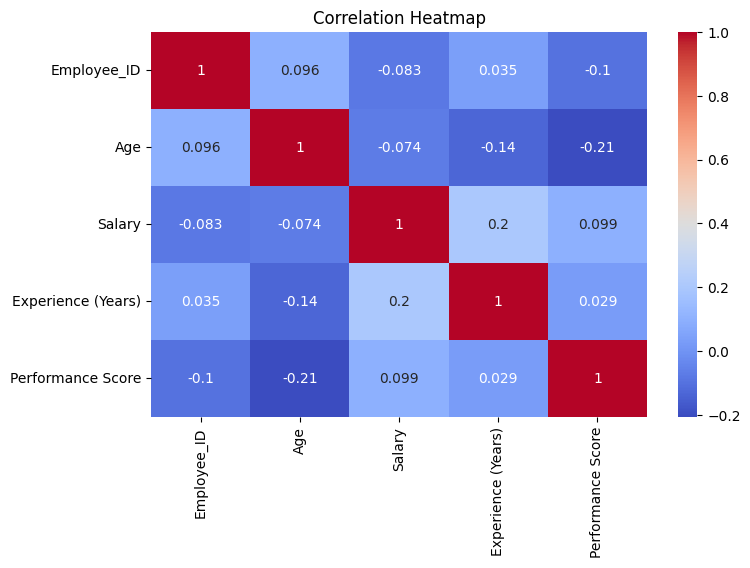

In [12]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Print correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
# Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use

# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols)

# Display processed dataset
print("Processed Dataset:\n", df.head())

# Visualizing relationships - Pair Plot
sns.pairplot(df)
plt.show()

Processed Dataset:
    Employee_ID  Age  Salary  Experience (Years)  Performance Score  Name_0  \
0          101   50  110592                   9                 84    True   
1          102   36   48110                  29                 92   False   
2          103   29  119309                  26                 97   False   
3          104   42   67266                  25                 65   False   
4          105   40   92992                  24                 91   False   

   Name_1  Name_2  Name_3  Name_4  ...  City_0  City_1  City_2  City_3  \
0   False   False   False   False  ...   False   False    True   False   
1   False   False   False   False  ...   False   False   False   False   
2   False   False   False   False  ...   False    True   False   False   
3   False   False   False   False  ...   False   False   False   False   
4   False   False   False   False  ...    True   False   False   False   

   City_4  City_5  City_6  City_7  Gender_0  Gender_1  
0   False 